# An Empirical Comparison of Supervised and Self-Supervised Learning

In [23]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [25]:
conv_args = TrainArgs(batchsize = 10)

In [26]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   999] avg mini-batch loss: 2.302
[epoch: 0, i:  1499] avg mini-batch loss: 2.301
[epoch: 0, i:  1999] avg mini-batch loss: 2.300
[epoch: 0, i:  2499] avg mini-batch loss: 2.301
[epoch: 0, i:  2999] avg mini-batch loss: 2.299
[epoch: 0, i:  3499] avg mini-batch loss: 2.294
[epoch: 0, i:  3999] avg mini-batch loss: 2.274
[epoch: 0, i:  4499] avg mini-batch loss: 2.220
[epoch: 0, i:  4999] avg mini-batch loss: 2.137
[epoch: 1, i:   499] avg mini-batch loss: 2.051
[epoch: 1, i:   999] avg mini-batch loss: 1.970
[epoch: 1, i:  1499] avg mini-batch loss: 1.903
[epoch: 1, i:  1999] avg mini-batch loss: 1.879
[epoch: 1, i:  2499] avg mini-batch loss: 1.813
[epoch: 1, i:  2999] avg mini-batch loss: 1.720
[epoch: 1, i:  3499] avg mini-batch loss: 1.683
[epoch: 1, i:  3999] avg mini-batch loss: 1.660
[epoch: 1, i:  4499] avg mini-batch loss: 1.614
[epoch: 1, i:  4999] avg mini-batc

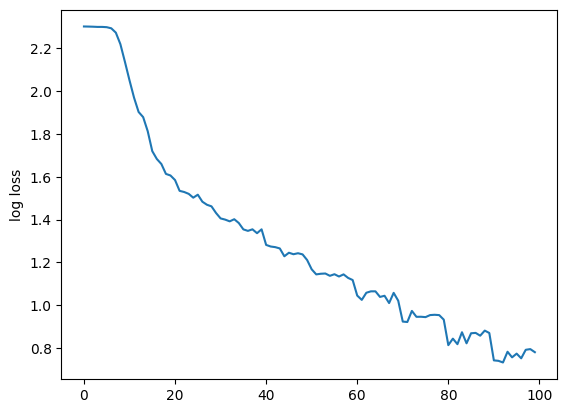

In [27]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [28]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 61.94 %


## Momentum Contrast

### Pre-Training the Encoder

In [29]:
encoder_args = TrainArgs(epochs = 20)

In [30]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.010830
Train Epoch: 2 	Loss: 0.001692
Train Epoch: 3 	Loss: 0.000714
Train Epoch: 4 	Loss: 0.000482
Train Epoch: 5 	Loss: 0.000391
Train Epoch: 6 	Loss: 0.000340
Train Epoch: 7 	Loss: 0.000314
Train Epoch: 8 	Loss: 0.000288
Train Epoch: 9 	Loss: 0.000272
Train Epoch: 10 	Loss: 0.000263
Train Epoch: 11 	Loss: 0.000255
Train Epoch: 12 	Loss: 0.000242
Train Epoch: 13 	Loss: 0.000234
Train Epoch: 14 	Loss: 0.000224
Train Epoch: 15 	Loss: 0.000211
Train Epoch: 16 	Loss: 0.000201
Train Epoch: 17 	Loss: 0.000201
Train Epoch: 18 	Loss: 0.000198
Train Epoch: 19 	Loss: 0.000191
Train Epoch: 20 	Loss: 0.000187


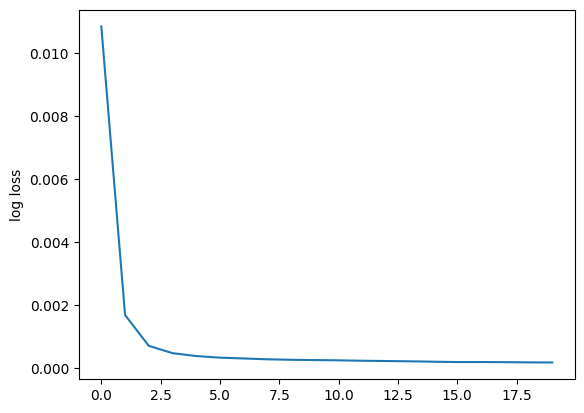

In [31]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [32]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [03:11<00:00, 52.28it/s]


In [33]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


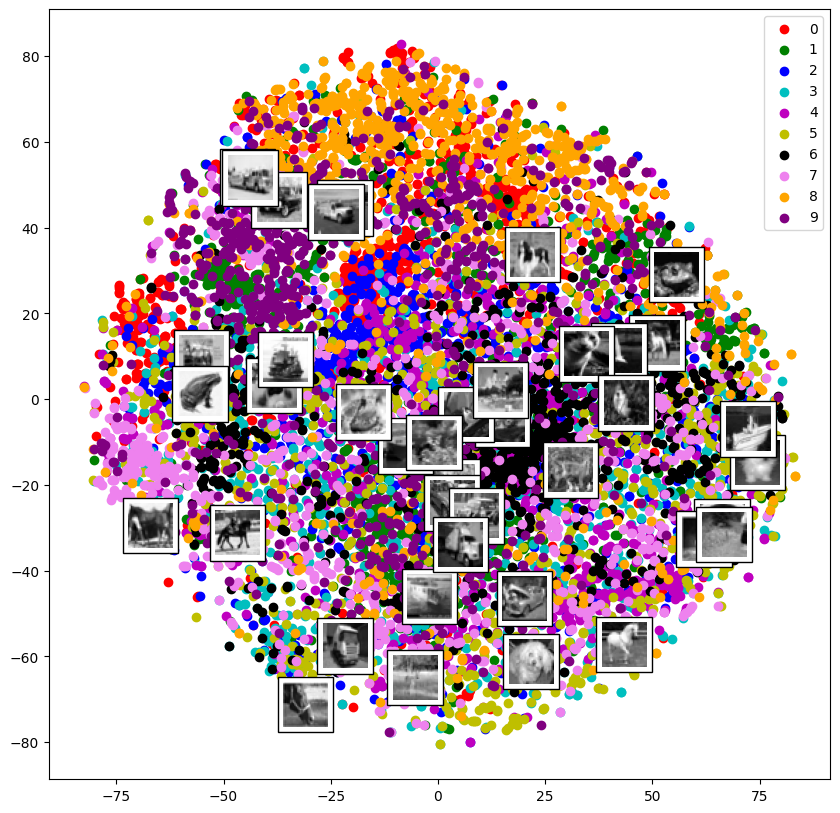

In [34]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [35]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [16:04<00:00, 51.86it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [03:16<00:00, 50.97it/s]


In [36]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [37]:
svm.score(X_test, y_test)

0.6202

### Multiple Runs

In [38]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [01:37<00:00, 51.53it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:19<00:00, 52.37it/s]


In [39]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [40]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.295
[epoch: 2, i:   499] avg mini-batch loss: 2.273
[epoch: 3, i:   499] avg mini-batch loss: 2.169
[epoch: 4, i:   499] avg mini-batch loss: 2.027
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.295
[epoch: 3, i:   499] avg mini-batch loss: 2.274
[epoch: 4, i:   499] avg mini-batch loss: 2.193
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.299
[epoch: 2, i:   499] avg mini-batch loss: 2.295
[epoch: 3, i:   499] avg mini-batch loss: 2.284
[epoch: 4, i:   499] avg mini-batch loss: 2.248
Files already downloaded and verified


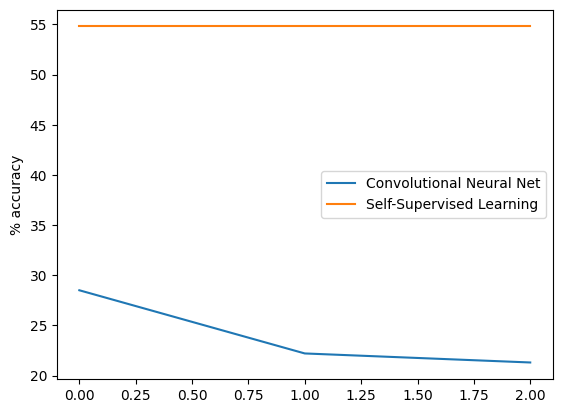

In [41]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [42]:
conv_errors

[28.499999999999996, 22.2, 21.3]

In [43]:
svm_errors

[0.548, 0.548, 0.548]

In [44]:
conv_errors

[28.499999999999996, 22.2, 21.3]